In [1]:
import netCDF4 as nc

filenames = ['MODIS images/S_NWC_modis_eos1_00000_20210911T1003490Z_20210911T1008505Z.nc',
            'MODIS images/S_NWC_modis_eos1_00000_20210911T2251170Z_20210911T2300534Z.nc',
            'MODIS images/S_NWC_modis_eos2_00000_20210911T1328500Z_20210911T1340054Z.nc',
            'MODIS images/S_NWC_modis_eos2_00000_20210911T2339170Z_20210911T2351197Z.nc']

dataset = nc.Dataset(filenames[0], 'r')
print("Dimensions:", dataset.dimensions.keys())
print("Variables:", dataset.variables.keys())

Dimensions: dict_keys(['time', 'ny', 'nx', 'nv'])
Variables: dict_keys(['time', 'time_bnds', 'lat', 'lon', 'nx', 'ny', 'image1', 'image2', 'image3', 'image4', 'image5', 'image6', 'image7', 'image8'])


In [4]:
import xarray as xr

dataset = xr.open_dataset(filenames[2])
dataset  # View Dataset structure

<xarray.Dataset> Size: 248MB
Dimensions:    (time: 1, nv: 2, ny: 4570, nx: 1354)
Coordinates:
  * time       (time) datetime64[ns] 8B 2021-09-11T13:34:27.700000
    lat        (ny, nx) float32 25MB ...
    lon        (ny, nx) float32 25MB ...
  * nx         (nx) uint16 3kB 0 1 2 3 4 5 6 ... 1348 1349 1350 1351 1352 1353
  * ny         (ny) uint16 9kB 0 1 2 3 4 5 6 ... 4564 4565 4566 4567 4568 4569
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 16B ...
    image1     (time, ny, nx) float32 25MB ...
    image2     (time, ny, nx) float32 25MB ...
    image3     (time, ny, nx) float32 25MB ...
    image4     (time, ny, nx) float32 25MB ...
    image5     (time, ny, nx) float32 25MB ...
    image6     (time, ny, nx) float32 25MB ...
    image7     (time, ny, nx) float32 25MB ...
    image8     (time, ny, nx) float32 25MB ...
Attributes: (12/20)
    comment:              Copyright 2018, EUMETSAT, All Rights Reserved
    data_source:          MYD021km_A21254_132850_2021254134120.h5 MYD03_A2125...
    region_id:            satproj
    license:              EUMETSAT user policy
    title:                NWC/PPS intermediate file, imager data
    source:               NWC/PPS version v2018
    ...                   ...
    id:                   /san1/pps/import/PPS_data/remapped/S_NWC_modis_eos2...
    date_created:         2021-09-11T13:45:12Z
    history:              2021-09-11 File created by NWC/PPS v2018
    institution:          SMHI
    processing_level:     Level 1c
    region_name:          satellite projection

In [9]:
loaded_data = xr.open_dataset(filenames[0], engine='netcdf4', decode_times=True)
variables=loaded_data.variables

In [6]:
print(dataset.variables)

Frozen({'time': <xarray.IndexVariable 'time' (time: 1)> Size: 8B
array(['2021-09-11T22:56:05.200000000'], dtype='datetime64[ns]')
Attributes:
    long_name:  time
    bounds:     time_bnds, 'time_bnds': <xarray.Variable (time: 1, nv: 2)> Size: 16B
[2 values with dtype=datetime64[ns]], 'lat': <xarray.Variable (ny: 3900, nx: 1354)> Size: 21MB
[5280600 values with dtype=float32]
Attributes:
    standard_name:  latitude
    long_name:      Latitude at the centre of each pixel
    units:          degrees_north
    valid_range:    [-90.  90.], 'lon': <xarray.Variable (ny: 3900, nx: 1354)> Size: 21MB
[5280600 values with dtype=float32]
Attributes:
    standard_name:  longitude
    long_name:      Longitude at the center of each pixel
    units:          degrees_east
    valid_range:    [-180.  180.], 'nx': <xarray.IndexVariable 'nx' (nx: 1354)> Size: 3kB
array([   0,    1,    2, ..., 1351, 1352, 1353], dtype=uint16)
Attributes:
    long_name:  pixel number
    units:      1, 'ny': <xarray.Ind

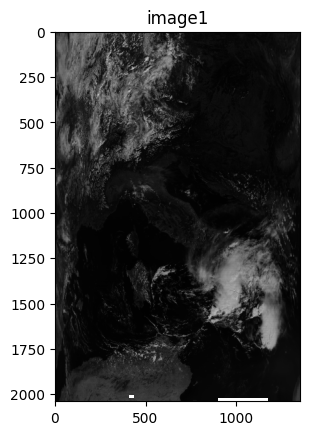

In [15]:
im1 = dataset.variables['image1'][:]
im2 = dataset.variables['image2'][:]

if len(im1.shape) == 3:  # Example: data with a time dimension
    im1 = im1[0, :, :]

import matplotlib.pyplot as plt

plt.imshow(im1, cmap='gray')  # Use 'gray' if grayscale, or another colormap
plt.title('image1')
plt.show()

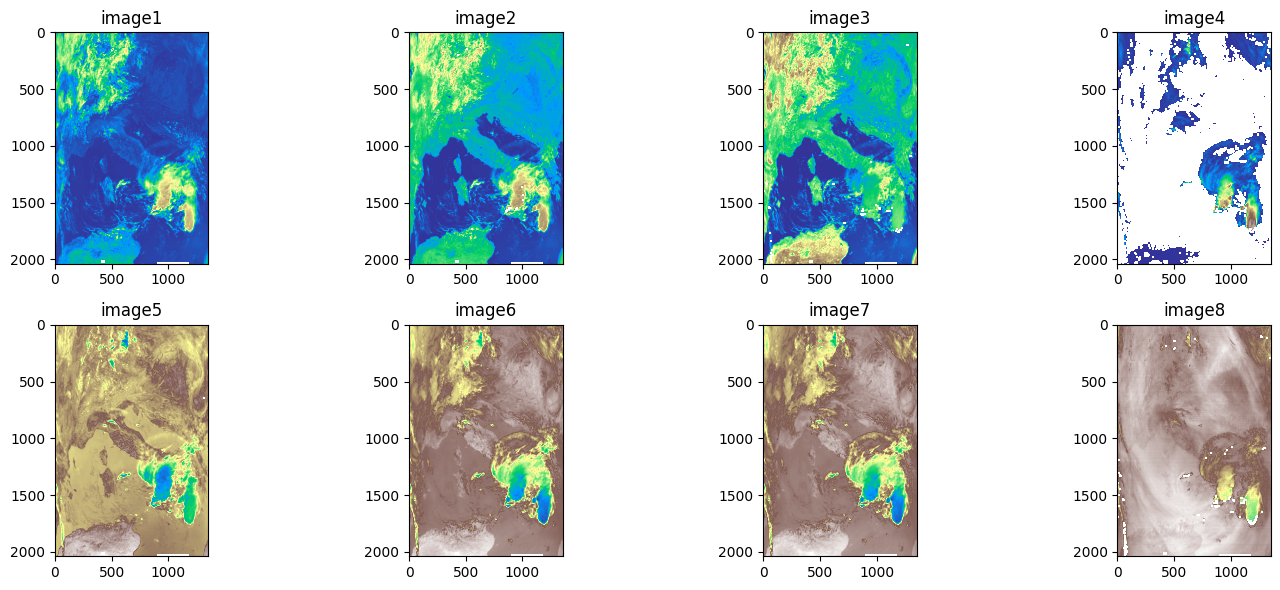

In [18]:
import matplotlib.pyplot as plt
import netCDF4 as nc

dataset = nc.Dataset(filenames[0], 'r') 

num_images = 8

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))  # Adjusted figsize

# Flatten axes for easier iteration
axes = axes.flatten()

for i, image_name in enumerate(['image1', 'image2', 'image3', 'image4', 
                                'image5', 'image6', 'image7', 'image8']):
    image_data = dataset.variables[image_name][:]

    # Reshape if necessary (refer to previous explanations)
    if len(image_data.shape) == 3:  # Example: data with a time dimension
        image_data = image_data[0, :, :]

    axes[i].imshow(image_data, cmap='terrain')
    axes[i].set_title(image_name)

# Remove extra spaces if not all 8 subplots are used
if num_images < len(axes):
    for ax in axes[num_images:]:
        ax.axis('off')

plt.tight_layout()
plt.show()
